# Car Brand Classification using TransferLearning (VGG16)

NOTE : i tried with resnet50 at first but ResNet50 was giving very poor accuracy so i tried with VGG16

In [1]:
# This code just limits the gpu usage till 60% ...
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [4]:
train_path = 'Datasets/Train'
test_path = 'Datasets/Test'
len(glob('Datasets/Train/*')) # Getting the number of the output classes

3

In [5]:
resnet = VGG16(input_shape=(224,224,3),
                 weights='imagenet',
                 include_top=False) # 3 for the RGB channel

58892288/58889256 [==============================] - 24s 0us/step


resnet = ResNet50(input_shape=(224,224,3),
                 weights='imagenet',
                 include_top=False) # 3 for the RGB channel

In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob(train_path+'/*')
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [8]:
x = layers.Flatten()(resnet.output)
x = layers.Dense(3,activation='softmax')(x) # final output layer

In [9]:
# Creating the model
model = Model(inputs = resnet.input, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
# Image Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./225,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

trainset = train_datagen.flow_from_directory('Datasets/train',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')
testset = test_datagen.flow_from_directory('Datasets/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [12]:
len(trainset),len(testset)

(2, 2)

In [13]:
hist = model.fit(trainset,
          steps_per_epoch=len(trainset),
          epochs=50,
          validation_data=testset,
          validation_steps=len(testset)
         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/50
2/2 [==============================] - 9s 5s/step - loss: 2.0474 - accuracy: 0.2344 - val_loss: 1.4088 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 650ms/step - loss: 1.1919 - accuracy: 0.4531 - val_loss: 1.6306 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 655ms/step - loss: 1.2854 - accuracy: 0.3906 - val_loss: 0.6293 - val_accuracy: 0.7241
Epoch 4/50
2/2 [==============================] - 1s 651ms/step - loss: 0.4566 - accuracy: 0.8125 - val_loss: 1.1484 - val_accuracy: 0.6379
Epoch 5/50
2/2 [==============================] - 1s 659ms/step - loss: 0.8157 - accuracy: 0.7344 - val_loss: 1.1536 - val_accuracy: 0.6552
Epoch 6/50
2/2 [==============================] - 1s 672ms/step - loss: 0.5383 - accuracy: 0.7188 - val_loss: 0.5792 - val_accuracy: 0.7586
Epoch 7/50
2/2 [==============================] - 1s 661ms/step - loss: 0

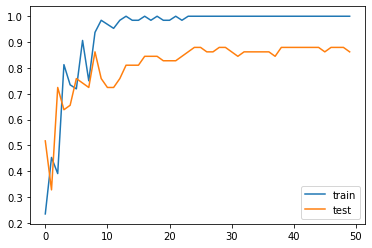

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])

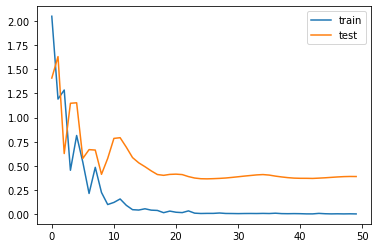

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])

In [19]:
from tensorflow.keras.models import load_model
model.save('VGG16.h5')
print('model saved Successfully !!')

model saved Successfully !!


In [20]:
y_pred = model.predict(testset)
y_pred

array([[8.48366246e-02, 8.00594151e-01, 1.14569269e-01],
       [1.04900971e-02, 7.79056968e-03, 9.81719315e-01],
       [1.63943521e-04, 9.99009252e-01, 8.26780510e-04],
       [9.47371183e-04, 8.91377449e-01, 1.07675120e-01],
       [4.33168337e-02, 9.93804038e-02, 8.57302725e-01],
       [3.44175642e-04, 9.99310851e-01, 3.44945205e-04],
       [2.91838624e-05, 9.98960853e-01, 1.01000676e-03],
       [5.26556559e-03, 3.75949126e-03, 9.90974963e-01],
       [4.00353369e-04, 9.99242187e-01, 3.57489975e-04],
       [4.97793794e-01, 1.02143222e-02, 4.91991967e-01],
       [6.13305978e-02, 1.12018518e-01, 8.26650858e-01],
       [8.81784916e-01, 1.01843230e-01, 1.63718332e-02],
       [4.11124714e-02, 1.27202086e-02, 9.46167350e-01],
       [1.74942330e-01, 5.81714837e-03, 8.19240510e-01],
       [3.37954116e-04, 9.99431312e-01, 2.30647725e-04],
       [3.81319271e-03, 9.90400732e-01, 5.78609202e-03],
       [1.00770814e-03, 9.96880770e-01, 2.11151969e-03],
       [9.88419056e-01, 9.83428

In [21]:
y_pred = np.argmax(y_pred , axis=1)
y_pred

array([1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2], dtype=int64)

In [34]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [113]:
model=load_model('VGG16.h5')
img = image.load_img('Datasets/Test/lamborghini/21.jpg',target_size=(224,224))
x = image.img_to_array(img)
x = x/255

In [114]:
x

array([[[0.00784314, 0.20784314, 0.6666667 ],
        [0.01568628, 0.20784314, 0.67058825],
        [0.01568628, 0.20784314, 0.67058825],
        ...,
        [0.9882353 , 0.85490197, 0.81960785],
        [0.9882353 , 0.85490197, 0.81960785],
        [0.99215686, 0.84705883, 0.8156863 ]],

       [[0.01176471, 0.21176471, 0.67058825],
        [0.01568628, 0.20784314, 0.67058825],
        [0.01960784, 0.21176471, 0.6745098 ],
        ...,
        [0.9882353 , 0.85490197, 0.81960785],
        [0.9882353 , 0.85490197, 0.81960785],
        [0.99215686, 0.84705883, 0.8156863 ]],

       [[0.01176471, 0.21176471, 0.67058825],
        [0.01568628, 0.20784314, 0.67058825],
        [0.01960784, 0.21176471, 0.6745098 ],
        ...,
        [0.9882353 , 0.85490197, 0.81960785],
        [0.9882353 , 0.85490197, 0.81960785],
        [0.99215686, 0.84705883, 0.8156863 ]],

       ...,

       [[0.49803922, 0.62352943, 0.9098039 ],
        [0.31764707, 0.4509804 , 0.7019608 ],
        [0.03137255, 0

In [115]:
x=np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [116]:
ans = model.predict(x)

In [117]:
ans

array([[0.04858455, 0.00606147, 0.945354  ]], dtype=float32)

In [118]:
np.argmax(ans)

2